In [1]:
from forex_python.converter import get_rate
from datetime import datetime
import pandas as pd

In [2]:
import yfinance as yf
ccies = ["GBP=X", "EUR=X", "CHF=X", 'SEK=X']
data = {}
for c in ccies:
    tickers = yf.Ticker(c)
    data[c[:3]] = tickers.history(period = "20y")

In [3]:
def get_ppp_data(loc):
    df = ppp[ppp['LOCATION']==loc]
    df = df[df['TIME']>2003]
    df['TIME'] = df.TIME.apply(lambda x:datetime(x, 1, 1, 0, 0))
    df.set_index('TIME', inplace=True)
    n = datetime.now()
    lastdate = datetime(n.year, n.month, n.day, 0, 0)
    
    df = df.Value.resample('d').last().fillna(method='ffill')    
    df[n] = None
    df = df.resample('d').last().fillna(method='ffill')
    return df

In [4]:
ppp = pd.read_csv('ppa.csv')
fra = get_ppp_data('FRA')
che = get_ppp_data('CHE')
swe = get_ppp_data('SWE')
gbr = get_ppp_data('GBR')
#fra

<AxesSubplot:title={'center':'EUR'}, xlabel='TIME'>

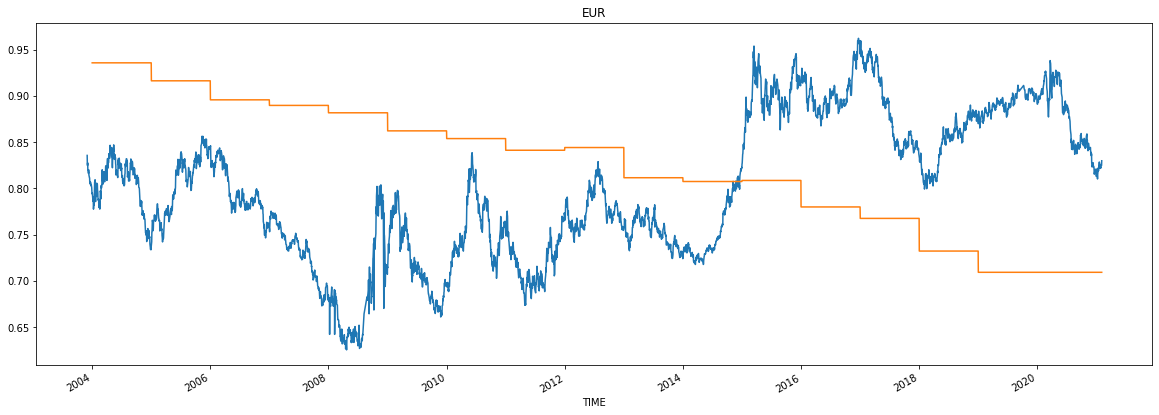

In [6]:

data["EUR"].Close.plot(figsize=(20, 7), title='EUR')
fra.plot()

<AxesSubplot:title={'center':'CHF'}, xlabel='TIME'>

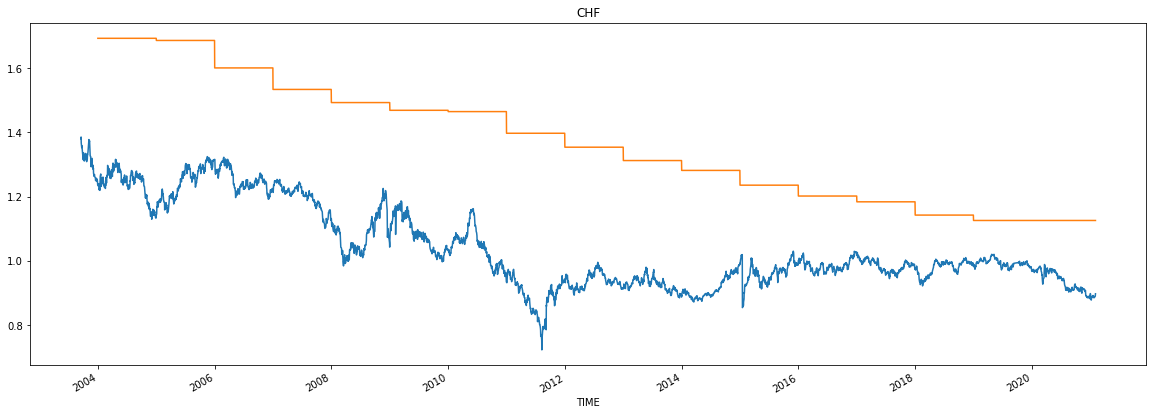

In [7]:
data["CHF"].Close.plot(figsize=(20, 7), title='CHF')
che.plot()

<AxesSubplot:title={'center':'SWE'}, xlabel='TIME'>

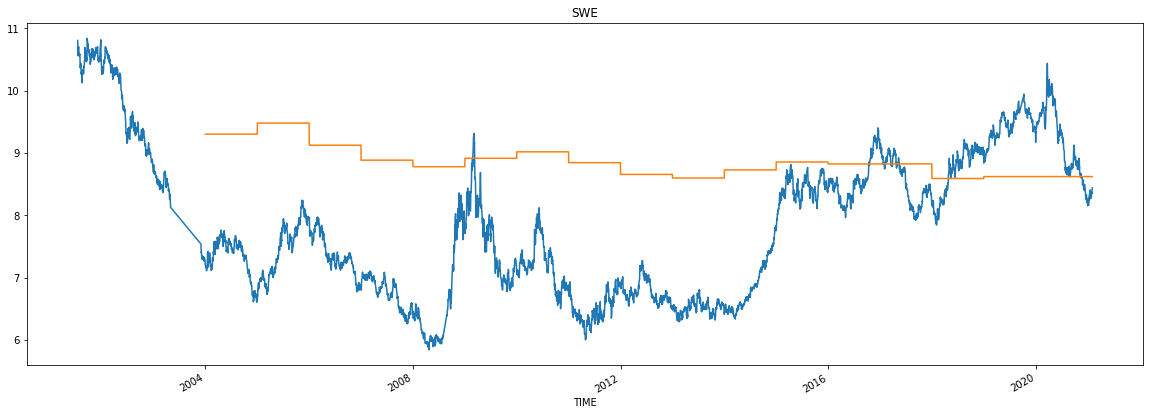

In [8]:
data["SEK"].Close.plot(figsize=(20, 7), title='SWE')
swe.plot()

<AxesSubplot:title={'center':'GBR'}, xlabel='TIME'>

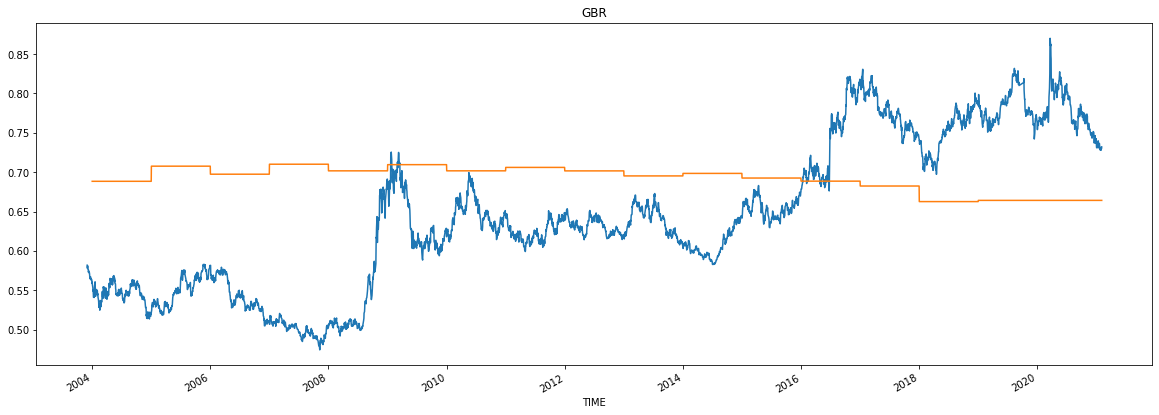

In [9]:
data["GBP"].Close.plot(figsize=(20, 7), title='GBR')
gbr.plot()